# Case Study 1: From Exploration to Design

- Name: KeChen Zhan
- Student ID: 63118954
- Link to GitHub Repository: https://github.com/13817586295jake-cmd/DSCI_200-CaseStudy

This blank notebook is provided for you to use to answer questions from [Case Study 1](https://ubc-dsci.github.io/dsci-200/case-studies/case-study-1.html). 

In [2]:
install.packages("tidyverse")
devtools::install_github("lbelzile/hecedsm")
library(tidyverse)
library(hecedsm)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmptmsGCY/remotese226531981/lbelzile-hecedsm-df0a544/DESCRIPTION’ ... OK
* preparing ‘hecedsm’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
  NB: this package now depends on R (>= 4.1.0)
  pipe |> or function shorthand \(...) syntax added in R 4.1.0.
  File(s) using such syntax:
    ‘SKD23_S2A.Rd’
* building ‘hecedsm_2025.06.18.tar.gz’



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘hecedsm’


The following object is masked from ‘package:stringr’:

    words




## Task 1: Choose your favourite dataset

In [3]:
data("BRLS21_EDA", package = "hecedsm")

### Read the paper and summarize goals of study. Write your summary in no more than 200 words and be sure to clearly explain:
1. Primary Research Objectives
    The study investigates the distraction potential of smartwatches compared to smartphones and vocal assistants within a controlled experimental driving setting. The researchers aimed to quantify how notification mediums (written vs. auditory) and response modalities (manual texting vs. oral dictation) influence a driver’s attentional state and behavioral performance. The core objective was to determine if the unique interaction metaphors of wearables elicit higher visual and cognitive workloads than traditional mobile devices.

2. Importance and Relevance
    As wearable technology proliferates, it creates a critical "legal gray area" and addresses a significant research gap in existing road safety literature. While mobile phone risks are well-documented, the regulatory framework for smartwa|tches remains underdeveloped. By providing empirical evidence grounded in physiological markers—such as HR and EDA—this study offers policymakers essential data to formulate clearer regulations and targeted safety interventions.

3. Specific Hypotheses and Outcomes
    The authors hypothesized that smartwatches would induce higher cognitive workloads and more frequent off-road glances than smartphones. They further predicted that manual texting would result in the most severe degradation of driving performance. Results confirmed these hypotheses, with vocal assistants identified as the safest alternative for in-vehicle communication due to minimized visual-manual interference

## Task 2: Explore data 

In [6]:
head(BRLS21_EDA)
glimpse(BRLS21_EDA)

id reltime task     occurence eda      hr      
1 1  0       baseline 1         20.60959 88.49560
2 1  1       baseline 1         21.41062 88.31564
3 1  2       baseline 1         22.26244 78.13892
4 1  3       baseline 1         24.22100 65.82009
5 1  4       baseline 1         24.23851 65.13290
6 1  5       baseline 1         23.63703 66.83456

Rows: 10,942
Columns: 6
$ id        <fct> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ reltime   <int> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ task      <fct> baseline, baseline, baseline, baseline, baseline, baseline, …
$ occurence <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ eda       <dbl> 20.60959, 21.41062, 22.26244, 24.22100, 24.23851, 23.63703, …
$ hr        <dbl> 88.49560, 88.31564, 78.13892, 65.82009, 65.13290, 66.83456, …


### What type of variables are in the dataset? (i.e numerical vs. categorical). Explain briefly. 

The dataset contains both the numerical and categorical, because fct(factor) is categorical variable, and int(integer) with dbl(double) are both numerical variables.



### Would you need to convert any variable in the dataset before starting your analysis? Explain briefly why or why not. 
Yes, I need re-level the “task” factor to ensure that ”baseline“ is the reference group for the analysis. This help to compare the physiological change in ”eda“ and ”hr“ between normal driving and distractions more clearly.

In [38]:
colSums(is.na(BRLS21_EDA))

id   reltime      task occurence       eda        hr 
        0         0         0         0       214       538

### How many missing values are there for each variable in the dataset? Are there any variables with a large proportion of missing data (e.g., more than 20%)? 

Base on the result, there are 214 missing data in eda column, and 538 missin data in hr column, 214/10942 = 2.0%, and  538/10942 = 4.9% , no variables with a large proportion of missing data.

In [39]:
table(BRLS21_EDA$task)


 baseline      cell voicecall     watch 
     2736      3028      1392      3786 

### Is there evidence of class imbalance in any categorical variable in the dataset (e.g., one category makes up a large majority of the observations)? 

No, there is no significant evidence of class imbalance that would compromise the analysis. While the watch category has the most observations (3786) and voicecall has the fewest (1392), all categories still represent a substantial portion of the total 10,942 rows. Since no single category dominate the dataset with a huge majority (e.g., >80%), the distribution is acceptable for comparing the physiological impact across different tasks.

## Task 3: Data visualization

### Select two numerical variables from the dataset and name them here. What type of plot would be appropriate to explore the relationship between these two variables? Write the R code to produce this plot. Describe any pattern you observe. 

I selected $EDA$ (Electrodermal Activity) and $HR$ (Heart Rate) as the two numerical variables for this analysis. A $scatter plot$ is the most appropriate visualization for exploring the relationship between them, as it effectively illustrates potential correlations"whether positive, negative, or non-existent" between these two physiological indicators.

Warning message:
“Removed 739 rows containing missing values or values outside the scale range
(`geom_point()`).”


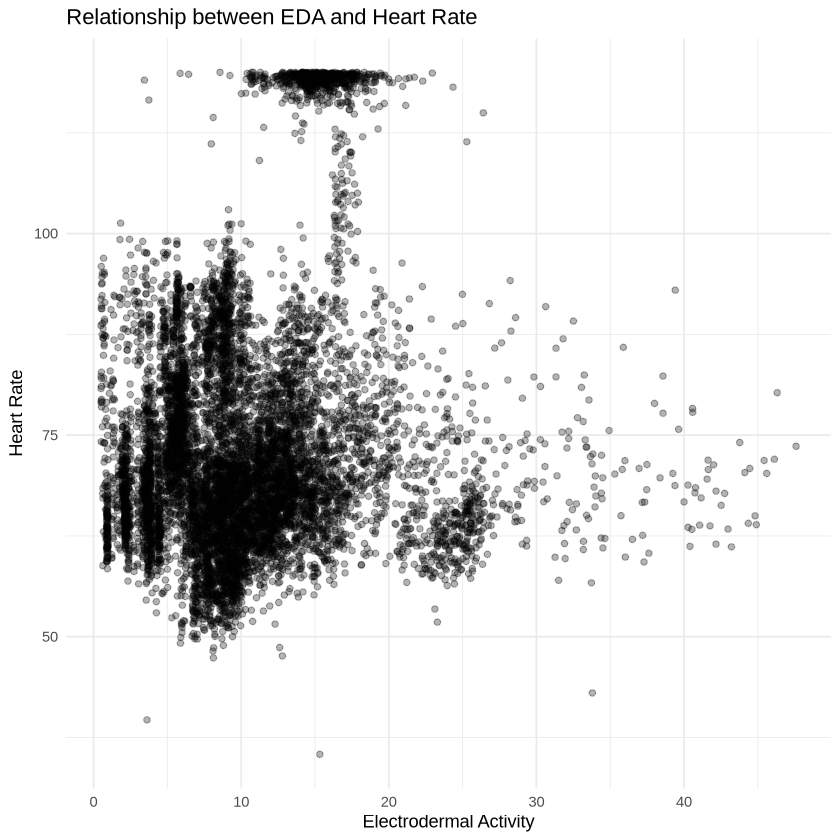

In [7]:
ggplot(BRLS21_EDA, aes(x = eda, y = hr)) +
  geom_point(alpha = 0.3, color = "black") +
  labs(title = "Relationship between EDA and Heart Rate",
       x = "Electrodermal Activity",
       y = "Heart Rate" ) +
  theme_minimal()

### Create an appropriate plot to show the distribution of one numerical variable in the dataset. What does the distribution tell you about the variable? What is a typical observation from this distribution?

Warning message:
“Removed 538 rows containing non-finite outside the scale range (`stat_bin()`).”


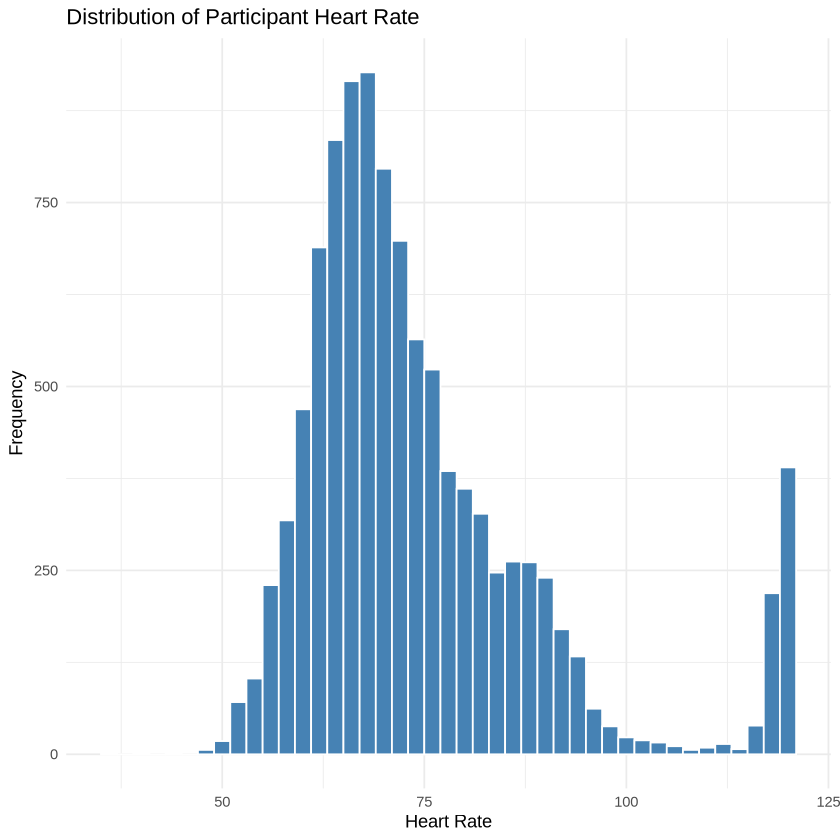

In [8]:
ggplot(BRLS21_EDA, aes(x = hr)) +
  geom_histogram(binwidth = 2, fill = "steelblue", color = "white") +
  labs(title = "Distribution of Participant Heart Rate",
       x = "Heart Rate",
       y = "Frequency") +
  theme_minimal()

The histogram reveals that the heart rate distribution is approximately right-skewed, with most observations clustering around a typical value of 70. However, the presence of a significant number of observations above 110 indicates that certain distraction tasks caused alot.

### Pick one numerical and one categorical variable from your dataset. Using an appropriate plot, what insights can you draw about the relationship between these two variables? 

Warning message:
“Removed 538 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


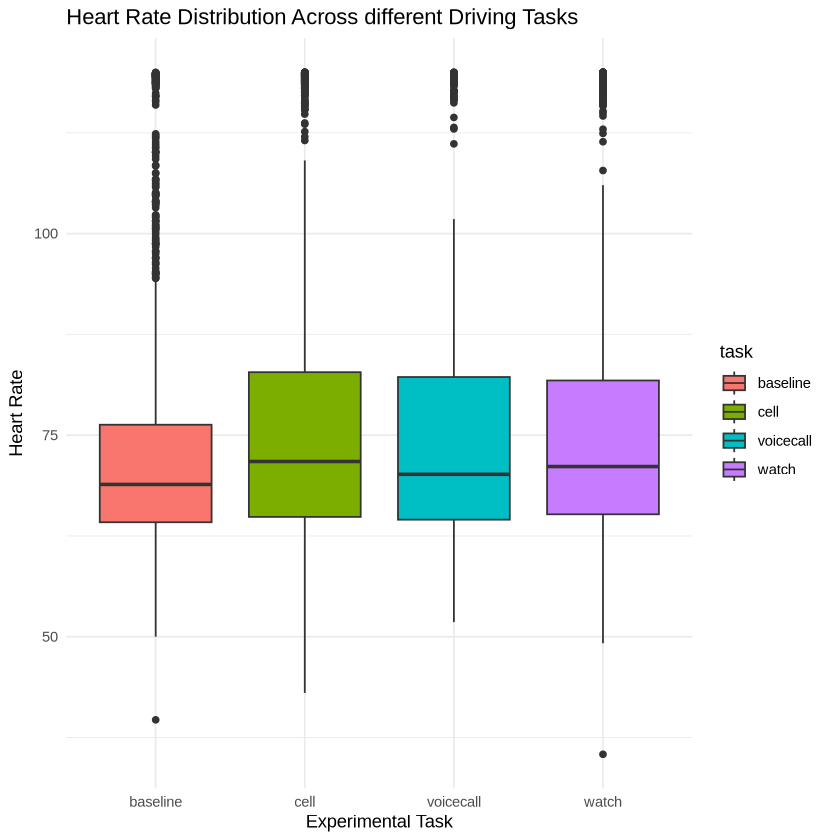

In [9]:
ggplot(BRLS21_EDA, aes(x = task, y = hr, fill = task)) +
  geom_boxplot() +
  labs(title = "Heart Rate Distribution Across different Driving Tasks",
       x = "Experimental Task",
       y = "Heart Rate") +
  theme_minimal() 

First, compared to the baseline, the median heart rate of all drivers performing distraction tasks increased significantly. Among them, the cell task showed the highest increase, which suggests that mobile phone notifications may cause the strongest physiological stress response in participants. Additionally, the interquartile range (IQR) of the boxes for these tasks is longer than the baseline. This indicates that heart rate fluctuations vary greatly among different participants and are not as stable as they are during the baseline.

## Task 4: Find summary statistics 

### Choose one numerical variable from your dataset. Report an appropriate measure of central tendency and explain why this measure is appropriate for the variable you selected

In [10]:
hr_summary <- BRLS21_EDA|>
  summarize(median_hr = median(hr, na.rm = TRUE),
            mean_hr = mean(hr, na.rm = TRUE),
            sd_hr = sd(hr, na.rm = TRUE))
            

hr_summary

median_hr mean_hr  sd_hr   
1 70.47726  74.63768 15.24607

I chose the $median$ as an appropriate measure of central tendency, because the heart rate data in this dataset is right-skewed, as shown by the fact that the mean (74.64) is significantly higher than the median (70.48). The mean is being pulled upward by extreme outliers

### Choose two variables from your dataset and compute an appropriate measure of association to measure their relationship. Interpret the value in a simple language. 

In [11]:
correlation_value <- BRLS21_EDA |>
  summarize(correlation = cor(hr, eda, use = "complete.obs"))
correlation_value

correlation
1 0.1435454

"The correlation coefficient between $HR$ and $EDA$ is approximately 0.144, which indicates a weak positive relationship. In simple language, this means that as EDA increase , their heart rate also tends to rise slightly, but the connection isn't very strong. This suggests that there might be confounding variables influences the HR and EDA.

## Task 5: Develop a question

### Think of a research question you would like to explore using this dataset if you were the author of this paper. Write your question in one or two sentences in simple and plain language.

In a driving simulator, which causes higher physiological stress (increased heart rate and skin conductance): manually texting or reading notifications on a smartwatch?

### Based on the question you wrote do you think you need to do the splitting of your data into train and test? Answer in two or three sentences. 

I do not believe splitting the data into training and testing sets is necessary because the goal of this task is descriptive analysis rather than predictive modeling. My objective is to summarize existing patterns and relationships within the collected data, such as comparing the physiological effects of different tasks. Since I am not building a machine learning model to predict outcomes for unseen data, using the entire dataset provides a more complete and accurate summary of the experimental results.

### Considering your dataset and research question, create a new feature derived from the existing variables in your dataset that could help you answer your question. Describe how you constructed this variable and explain why you think it will be useful.

In [12]:
baseline_avg <- BRLS21_EDA |>
filter(task == "baseline") |>
summarize(mean_hr_base = mean(hr, na.rm = TRUE)) |>
pull(mean_hr_base)

BRLS21_EDA_new <- BRLS21_EDA |>
mutate(hr_diff = hr - baseline_avg) # hr_diff is current hr minus baseline average

head(BRLS21_EDA_new)

id reltime task     occurence eda      hr       hr_diff 
1 1  0       baseline 1         20.60959 88.49560 16.15973
2 1  1       baseline 1         21.41062 88.31564 15.97977
3 1  2       baseline 1         22.26244 78.13892  5.80305
4 1  3       baseline 1         24.22100 65.82009 -6.51578
5 1  4       baseline 1         24.23851 65.13290 -7.20297
6 1  5       baseline 1         23.63703 66.83456 -5.50131

I created a new variable called hr_diff. To construct this, I first calculated the mean heart rate during the baseline condition for each participant. Then, I used the mutate() function to subtract this baseline average from the instantaneous heart rate (hr) in every row of the dataset.

why is this useful?

This variable is useful because it shows the actual increase in stress for each person. Since everyone has a different resting heart rate, looking at the difference (hr_diff) is a fairer way to measure how much a phone or watch actually 'scared' or stressed them out compared to their normal state.

## Task 6: Describe design

### What type of data analysis questions are the authors of the paper hoping to answer? Recall the different types of data analysis questions you learned in DSCI 100 (e.g., descriptive, inferential, predictive, causal, exploratory). Which category or categories best describe the authors’ goals?

The primary goal of the authors is to answer predictive and inferential data analysis questions. The research team collected physiological data such as heart rate and skin conductance under various conditions to build models that can predict whether a driver is currently distracted. Instead of just describing the observed changes, the authors use this information to infer a strong relationship between secondary tasks and physiological stress. This allowed them to prove the potential safety risks caused by distracted driving.

### Describe the population and sample used in this study. Clearly define both the population of interest and the sample that was actually observed in the study. 

The population of interest in this study consists of all licensed drivers who use smartphones and wearable devices (such as smartwatches) in their daily lives

The sample that was actually observed consists of 31 volunteers (16 males and 15 females) recruited from Texas A&M University. These participants were between the ages of 18 and 47, held valid driver's licenses, and had normal or corrected-to-normal vision.

### Was this an observational study or controlled experiment study? Explain your reasoning using relevant terminology.

This study is a controlled experiment because the researchers did not only watch what drivers normally do. The participants were asked to use certain devices, like a phone, smartwatch, or vocal assistant, while driving in a simulator. Since the researchers decided what device each person use, the independent variable was controlled and not happening naturally.

The researchers also used random assignment for the task order. Participants did not finish the activities in the same order, which help reduce problems like getting tired or being more familiar with the simulator. This makes the comparison between different devices more fair and believable.

The experiment was done in a driving simulator, so many conditions like road, traffic, and weather were kept the same. Because of this, changes in attention or heart rate were more likely caused by the device use. Since the tasks were assigned and the environment was controlled, this study is a controlled experiment.


## Task 7: Dive into the design! 

### Did researchers control for any confounding variable in this study? If yes explain how. If no, can you think of any potential confounding variable that you can adjust for? Explain your reasoning.

In my opinion, the researchers controlled three main confounding variables:

First is Notification Content: They randomized the message content across the four tasks (Phone, Watch, Speaker, and Texting). This was done to prevent bias caused by some messages being more distracting or difficult than others.

Second is Task Order: The order of the four experimental tasks was randomly assigned to each participant. This helps to avoid the "order effect," which means results won't be affected by people getting tired or getting better at the simulator over time.

Third is Task Type: The notification format was kept the same for all conditions. Every task included 6 notifications, consisting of 2 statements, 2 general questions, and 2 math problems. This ensured that the difficulty of the tasks remained consistent.

However, I identified four potential confounding variables that were not controlled:

First is Device Brand Familiarity: The study only used Apple products. They did not consider if participants were more familiar with other brands like Android or Huawei. People who don't usually use Apple might feel more stressed or distracted just because they aren't used to the device.

Second is Age Distribution: 24 out of the 31 participants were between 20 and 26 years old. Since different age groups have different reaction speeds and technology habits, this young sample makes it hard to apply the findings to older drivers.

Third is Vision Issues: There was no specific vision screening for the participants. Even if they have a license, differences in eyesight like nearsightedness or astigmatism could change how long they look at the screen, which messes with the measurement of distraction.

Fourth is Familiarity Difference Between Devices: Most people are more familiar with phones than smartwatches. This difference in daily usage might make the smartwatch appear more distracting simply because the user isn't used to it yet, rather than because of the device itself.

### Were there any potential sources of sampling bias that may have affected the study’s conclusions? Explain your reasoning. 

In my opinion, there are some sampling biases in this study that could affect the final results:

Age Bias: Among the 31 participants, 24 of them were between 20 and 26 years old, which means the sample is too focused on young people. Drivers in different age groups usually have different reaction speeds and habits. For example, young people are often more familiar with using new gadgets than older drivers. Because the sample is so young, the study's conclusions might only apply to young drivers and may not represent the general population.

Device Brand Bias: This study only used Apple products and did not include other brands like Huawei or Microsoft. Some drivers are very comfortable with Apple’s interface, but non-Apple users might find it confusing or difficult to use. Since the researchers did not test other brands, the results might only show how people react to Apple devices instead of all smartwatches or phones.

As a result, these biases limit the generalizability of the study. Since the sample was mostly young Apple users, we cannot be sure if the findings would be the same for older drivers or for people using different brands of technology.


## Task 8: Now it is your turn! 

### If you were to design this study yourself, would you use a different sampling and design method? Why or why not? Reflect on what you might do differently and how your choice of sampling method might affect the results. Additionally, consider why the authors might have chosen not to use alternative sampling or design methods. What are the potential limitations or challenges of your proposed approach?

If I were to redesign this study, I would switch to Stratified Random Sampling. I would divide the population into different groups based on age (such as 18-30, 31-50, and 51+) and smartphone brand (iOS, Android, etc.), and then randomly select an equal proportion of participants from each layer. In addition, for the experimental design, I would include a "familiarization phase." This would give participants who are not Apple users enough time to get used to the experimental devices, ensuring everyone has a similar level of proficiency before the actual test begins.

The primary reason for choosing this approach is to fix the sampling bias and significantly improve the study's generalizability. The current sample is mostly young, tech-savvy people, so it does not represent older drivers or the huge number of Android users. Stratified sampling ensures these ignored groups are included, making the conclusion applicable to real-world drivers. Secondly, adding the familiarization phase helps eliminate "operation anxiety" as a confounding variable. If participants are not familiar with the device, their heart rate might go up just because they can't find a button or feel frustrated, not because they are distracted by driving. By leveling the playing field, we can be sure that the physiological stress we measure is actually caused by multitasking, which ensures the internal validity of the data.

However, the authors likely did not use this method because of cost and feasibility. Using convenience sampling on campus is much faster and cheaper than finding specific groups of people, and using a single device ensures that the vibration and notification style are standardized. My proposed method definitely has limitations: recruiting older drivers to come to a lab is very difficult and expensive. Also, introducing multiple brands and ages would add a lot of "noise" and variance to the data. This means I would need a massive sample size to smooth out these differences and get a statistically significant result.
